##  <span style = "color:red"> AIF-P04-다항회귀와 결정트리 </span>  과제

### (1): Polynormial regression (다항회귀)

- 'poly_reg_data.csv' 파일에는 아래의 dataset이 있음.
  - 1차원(1-D) 특징(x): 500개, 라벨값(y): 500개
  - 학습 sample 개수 : test sample 개수 = 7:3
  - train_test_split()의 random_state=42를 사용함.
  
- 문제 1-1: 파일을 읽어서 다항회귀를 수행해서 아래의 식이 최소가 되는 다항회귀의 차수를 결정하라.

  - $mse(n) = \frac{1}{150}\sum_{i = 1}^{150} \left( y_i - y_i^n\right)^2$
  
  여기에서 $y_i$는 label이고, $y_i^n$은 $n$-차 다항회귀를 통한 예측치이다.

- 문제 1-2: 가로축은 $n$ (다항회귀의 차수)이고, 세로축은 $mse(n)$인 그래프를 그려라.

- 문제 1-3: (문제 1-1)에서 결정된 $n$에 대해, 가로축은 test sample의 라벨값($y_i$), 세로축은 예측값($ y_i^n$)인 그래프를 그려라.
   


#### (1) Data generation for polynormial regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/2024-02/AI기초/주별과제

AIF-P01-데이터정제-00팀-결과보고서.ipynb
AIF-P01-데이터정제-00팀-결과보고서-학생용.ipynb
AIF-P01-데이터정제-풀이.ipynb
AIF-P02-선형회귀-00팀-결과보고서.ipynb
AIF-P02-선형회귀-풀이.ipynb
AIF-P03-KNN-결과보고서-학생용.ipynb
AIF-P03-KNN-풀이.ipynb
AIF-P04-다항회귀-결정트리-00팀-결과보고서-학생용.ipynb
poly_reg_data.csv


<Axes: xlabel='feature', ylabel='label'>

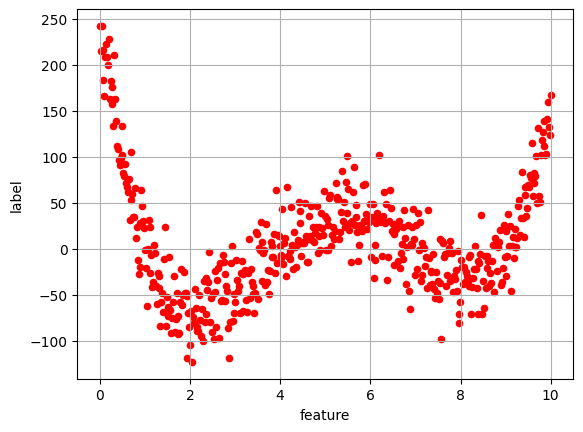

In [ ]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('drive/MyDrive/2024-02/AI기초/주별과제/poly_reg_data.csv')
df.plot.scatter(x = 'feature', y = 'label', c = 'red', grid='on')

문제 1-1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

X = df['feature'].to_numpy()
y = df['label'].to_numpy()
X = X.reshape(-1,1)
print("X.shape, y.shape = ", X.shape, y.shape)

min_mse = 1000000.
min_degree = 0

degree = []
mse = []

# 아래에 코드 작성하기

print("\nMinimum MSE {0:.4f} and its degree {1}".format(min_mse, min_degree))

X.shape, y.shape =  (500, 1) (500,)
	Degree 2, MSE(3457.8143)
	Degree 4, MSE(617.1116)
	Degree 6, MSE(624.7818)
	Degree 8, MSE(627.9660)
	Degree 10, MSE(652.2958)
	Degree 12, MSE(653.7269)

Minimum MSE 617.1116 and its degree 4


문제 1-2:

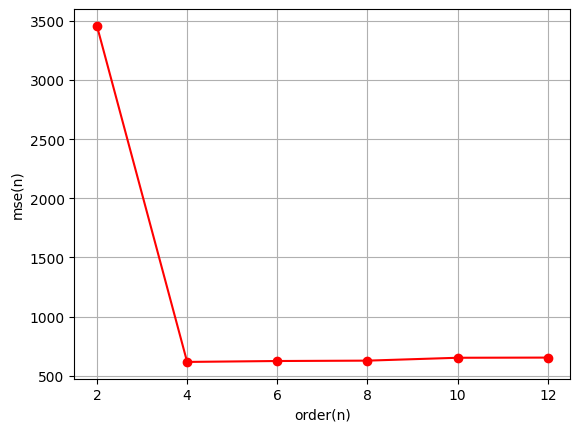

In [ ]:
# 아라에 코드 작성하기


plt.xlabel('order(n)')
plt.ylabel('mse(n)')
plt.grid()

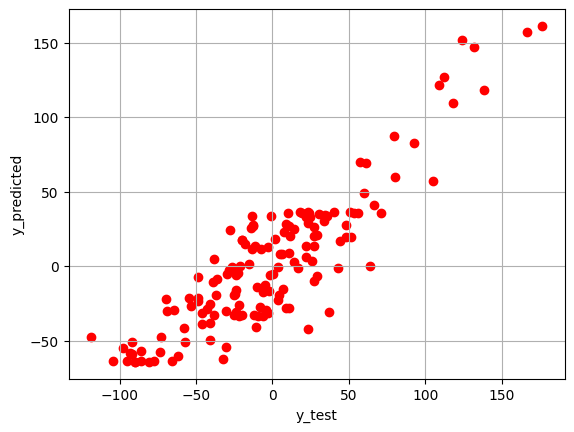

In [ ]:
# 아래에 코드 작성하기 (가로축: 정답값, 세로축: 예측값)

plt.xlabel('y_test')
plt.ylabel('y_predicted')
plt.grid()

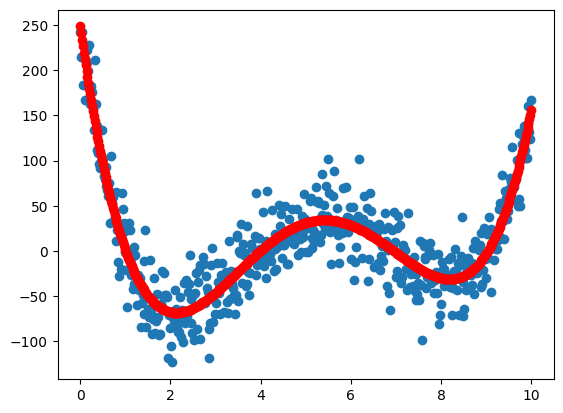

In [ ]:
#한번 살펴보면 좋은만한 코드입니다.

X = X.reshape(-1,1)     # 입력을 2차원 벡터가 되게 한다. shape = (m, 1)
poly_feature = PolynomialFeatures(degree = min_degree)
Xc = poly_feature.fit_transform(X)
lin_model = LinearRegression()
lin_model.fit(Xc, y)

Xd = np.linspace(0, 10, 500).reshape(-1,1) # 입력은 2차원 벡터로 변형
Xd_poly = poly_feature.fit_transform(Xd)
y_hat_Xd_poly = lin_model.predict(Xd_poly)
plt.scatter(df['feature'], df['label'])
plt.scatter(Xd, y_hat_Xd_poly, color='r')